<a href="https://colab.research.google.com/github/franckepeixoto/IGTI-Analista-de-Machine-Learning/blob/main/IGTI_M%C3%B3dulo_5_%5BDesafio_Final%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Enunciado**
Neste desafio final, vamos empregar boa parte dos conceitos mostrados no decorrer de
todos os módulos do **Bootcamp** para a análise e a classificação de veículos do conhecido
dataset **“cars”**. 

> Esse dataset contém um conjunto de informações sobre vários veículos
pesquisados. 

>Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e
cilindradas cúbicas. 

____
Para essa análise, vamos empregar os conceitos de redução da dimensionalidade com o **PCA**, clusterização com o **K-Means** e **Classificações** com algoritmos supervisionados.

1. Acessar o link abaixo e realizar o download do arquivo **cars.csv**.

In [164]:
import numpy as np
import pandas as pd
import requests
def transpose(d):
  return pd.DataFrame(d).transpose()
url ='https://drive.google.com/uc?export=download&id=1Gjumb68_WrOOJr-7YUKH3yFk6rNJrHH2'
cars = pd.read_csv(url)
cars_original = cars.copy()
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,261.0,23.144828,7.823570,10.0,16.9,22.0,28.8,46.6
cylinders,261.0,5.590038,1.733310,3.0,4.0,6.0,8.0,8.0
hp,261.0,106.360153,40.499959,46.0,75.0,95.0,138.0,230.0
time-to-60,261.0,15.547893,2.910625,8.0,14.0,16.0,17.0,25.0
year,261.0,1976.819923,3.637696,1971.0,1974.0,1977.0,1980.0,1983.0


In [165]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [166]:
cars.tail(3)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.
260,22.0,6,250,105,3353,15,1977,US.


2. Para a implementação dos algoritmos, utilizear as definições abaixo:

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

random_state = 42

scaler = StandardScaler()
pca = PCA(n_components=7)
kmeans = KMeans(n_clusters=3,random_state=random_state)
dtc = DecisionTreeClassifier(random_state=random_state)
lr = LogisticRegression(random_state=random_state) 



3. Para as questões que envolvem a construção de modelos supervisionados, você
deve utilizar o dataset original para definir a eficiência dos veículos.

 Além disso, deveutilizar as variáveis:  **['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'timeto-60']** como entrada. 
 
 A saída deve ser a classificação de eficiência do veículo.
 

In [168]:
#cars = cars[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']]

1 .Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:

In [169]:
transpose(cars.isna().sum())

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,0,0,0,0,0,0,0,0


In [170]:
transpose(cars.dtypes)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,float64,int64,object,int64,object,int64,int64,object


2. Realize a transformação das colunas **“cubicinches”** e “weightlbs” do tipo **“string”** para o tipo numérico utilizando o **pd.to_numeric()**, utilizando o parâmetro  errors='coerce'. Após essa transformação, é CORRETO afirmar:

In [171]:
cars.cubicinches =  pd.to_numeric(cars.cubicinches,errors='coerce')
transpose(cars.isna().sum())

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,0,0,2,0,0,0,0,0


3. Indique quais eram os índices dos valores presentes no dataset que **“forçaram”** o pandas a compreender a variável **“cubicinches”** como string.

In [172]:
#coerce =  Análise inválida será definida como NaN.
cars_original[cars_original.cubicinches==' '].index

Int64Index([40, 180], dtype='int64')

4. Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [173]:
cars.weightlbs =  pd.to_numeric(cars.weightlbs,errors='coerce')

transpose(cars.isna().sum())

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,0,0,2,0,3,0,0,0


5. Substitua os valores nulos introduzidos no dataset após a transformação pelo valor médio das colunas.  Qual é o novo valor médio da coluna **“weightlbs”**?

In [174]:
cars.loc[cars.cubicinches.isna(),'cubicinches'] =  cars.cubicinches.mean()
cars.loc[cars.weightlbs.isna(),'weightlbs'] =  cars.weightlbs.mean()

cars.weightlbs.mean()

3009.8333333333335

6. Após substituir os valores nulos pela média das colunas, selecione as colunas **['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']**. Qual é o valor da mediana para a característica 'mpg'?

In [175]:
cars.mpg.median()

22.0

7. Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

In [176]:
transpose(cars['time-to-60'].describe())


,count,mean,std,min,25%,50%,75%,max
time-to-60,261.0,15.547893,2.910625,8.0,14.0,16.0,17.0,25.0


8. Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:

In [177]:
cars[['cylinders','mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


9. Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:
Grupo de escolhas da pergunta


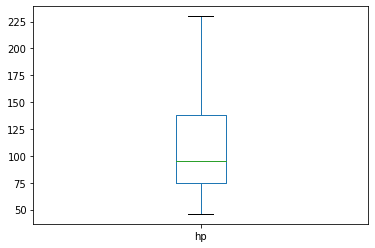

In [178]:
cars.hp.plot.box()

10. Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

In [179]:
print('Antes:\t',cars.hp.max())
cars.hp = scaler.fit_transform(cars.hp.values.reshape(-1,1))
print('Depois:\t',cars.hp.max())

Antes:	 230
Depois:	 3.05870398977614


11. Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?

In [180]:
pca.fit(cars[cars.columns[:-1]])
pca.explained_variance_
pca.components_

array([[-7.54290397e-03,  1.81683306e-03,  1.18045838e-01,
         1.00629347e-03,  9.92975269e-01, -1.63313644e-03,
        -1.19153729e-03],
       [-1.96355544e-02,  1.35560601e-02,  9.91942502e-01,
         7.19468026e-03, -1.18182122e-01, -3.15535453e-02,
        -2.15950892e-02],
       [ 8.36629255e-01, -1.31787086e-03,  3.16138097e-02,
        -1.77279432e-02,  3.40719256e-03,  8.64910315e-02,
         5.39670022e-01],
       [-5.22848327e-01,  1.29868904e-02,  2.06788708e-03,
         4.55282298e-03, -3.50915446e-03, -1.62481900e-01,
         8.36673940e-01],
       [-1.61776932e-01, -1.85589127e-03,  3.02877827e-02,
        -1.20905261e-01, -2.99365701e-03,  9.74879806e-01,
         8.88242682e-02],
       [-8.14832542e-03, -9.82250976e-01,  1.27806847e-02,
         1.85634032e-01,  7.30148101e-05,  1.82502615e-02,
         1.26573238e-02],
       [-7.03686992e-04,  1.86606838e-01, -5.55415524e-03,
         9.74953404e-01, -4.59576621e-04,  1.19987220e-01,
         1.4671748

12. Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar que:

In [182]:
k = kmeans.fit(pca.components_[:3])
k.cluster_centers_

array([[-0.01963555,  0.01355606,  0.9919425 ,  0.00719468, -0.11818212,
        -0.03155355, -0.02159509],
       [-0.0075429 ,  0.00181683,  0.11804584,  0.00100629,  0.99297527,
        -0.00163314, -0.00119154],
       [ 0.83662926, -0.00131787,  0.03161381, -0.01772794,  0.00340719,
         0.08649103,  0.53967002]])

13. Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ['cylinders' ,'cubicinches'            ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada.

Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [200]:
cars['eficientes'] = 0
cars.loc[cars.mpg>25,'eficientes']=1
x = cars[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']]
x = scaler.transform(x)
y =  cars['eficientes']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=random_state)

In [201]:
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(random_state=random_state)
dtc = dtc.fit(xtrain,ytrain)
predicts  = dtc.predict(xtest)
accuracy_score(ytest,predicts)

0.8734177215189873

14. Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

In [202]:
from sklearn.metrics import confusion_matrix
verdadeiro_negativo, falso_positivo, falso_negativo, verdadeiro_positivo = confusion_matrix(ytest,predicts).ravel()
print('verdadeiro_negativo:\t',verdadeiro_negativo)
print('falso_positivo:\t\t',falso_positivo)
print('falso_negativo:\t\t',falso_negativo)
print('verdadeiro_positivo:\t',verdadeiro_positivo)

verdadeiro_negativo:	 33
falso_positivo:		 8
falso_negativo:		 2
verdadeiro_positivo:	 36


15. Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho.


Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar que:

In [204]:
lr = LogisticRegression(random_state=random_state) 
lr = lr.fit(xtrain,ytrain)
predicts  = lr.predict(xtest)
accuracy_score(ytest,predicts)

0.8227848101265823